# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import os
import csv

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}units=Metric&APPID={weather_api_key}&q={city}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la'ie
Processing Record 2 of Set 1 | warrnambool
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | donostia / san sebastian
City not found. Skipping...
Processing Record 11 of Set 1 | marudi
City not found. Skipping...
Processing Record 12 of Set 1 | flying fish cove
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | vernon
Processing Record 17 of Set 1 | taoudenni
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | fale old settlement
Processing Record 

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la'ie,21.6477,-157.9253,27.98,72,18,4.02,US,1712701012
1,warrnambool,-38.3833,142.4833,14.24,81,75,4.76,AU,1712701173
2,cabo san lucas,22.8909,-109.9124,27.56,43,0,2.06,MX,1712700969
3,polyarnyy,69.1989,33.4478,-3.84,92,100,1.63,RU,1712701185
4,port-aux-francais,-49.3500,70.2167,8.52,94,100,17.16,TF,1712701185


In [63]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/City_Data.csv", index_label="City_ID")


In [64]:
# Read saved data
city_data_df = pd.read_csv("output_data/City_Data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la'ie,21.6477,-157.9253,27.98,72,18,4.02,US,1712701012
1,warrnambool,-38.3833,142.4833,14.24,81,75,4.76,AU,1712701173
2,cabo san lucas,22.8909,-109.9124,27.56,43,0,2.06,MX,1712700969
3,polyarnyy,69.1989,33.4478,-3.84,92,100,1.63,RU,1712701185
4,port-aux-francais,-49.3500,70.2167,8.52,94,100,17.16,TF,1712701185


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

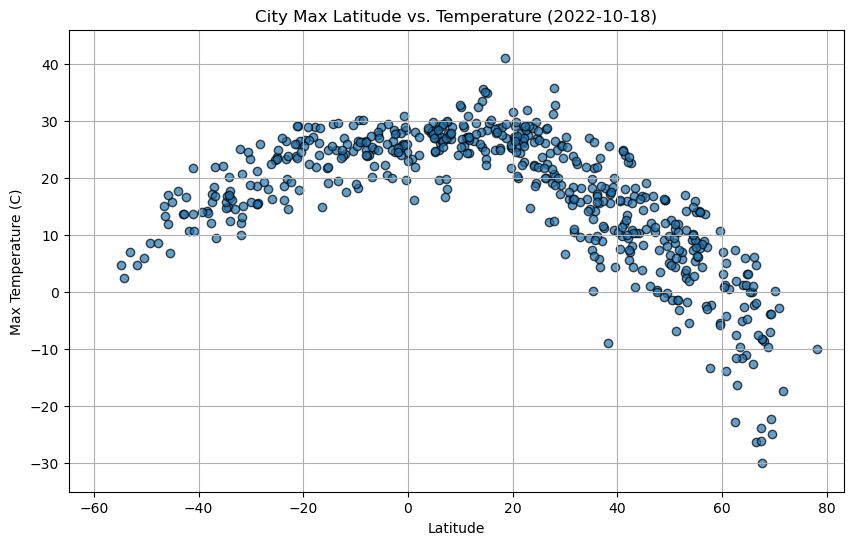

In [83]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', alpha = 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)
plt.xlim(city_data_df['Lat'].min() - 10, city_data_df['Lat'].max() + 5)
plt.ylim(city_data_df['Max Temp'].min() - 5, city_data_df['Max Temp'].max() + 5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

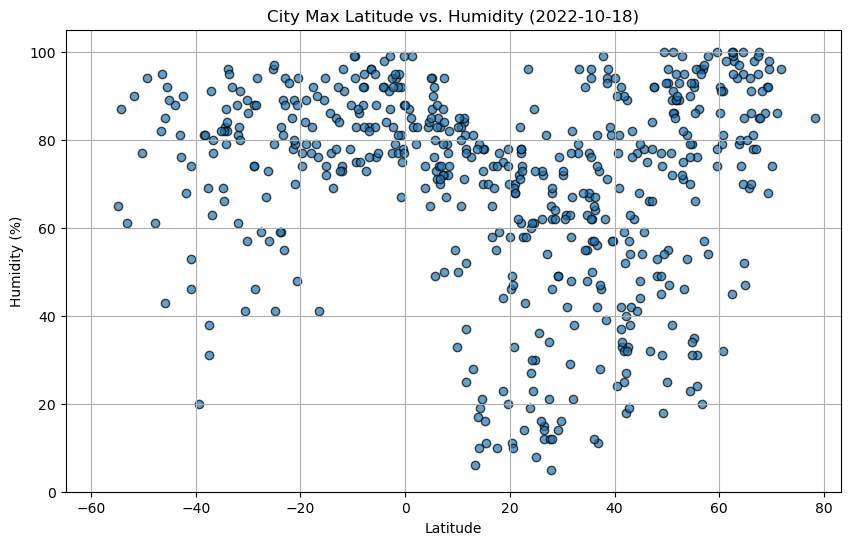

In [85]:
# Build the scatter plots for latitude vs. humidity

plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', alpha = 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.grid(True)
plt.xlim(city_data_df['Lat'].min() - 10, city_data_df['Lat'].max() + 5)
plt.ylim(city_data_df['Humidity'].min() - 5, city_data_df['Humidity'].max() + 5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

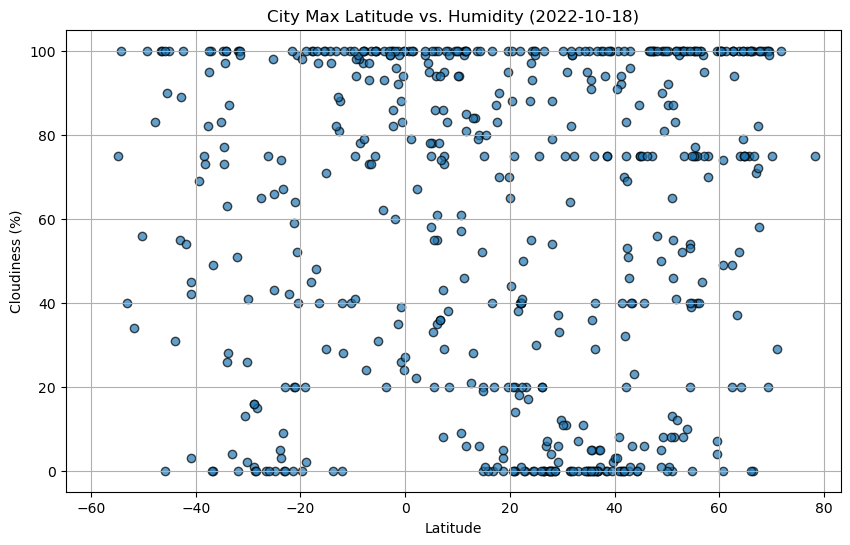

In [86]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', alpha = 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.grid(True)
plt.xlim(city_data_df['Lat'].min() - 10, city_data_df['Lat'].max() + 5)
plt.ylim(city_data_df['Cloudiness'].min() - 5, city_data_df['Cloudiness'].max() + 5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

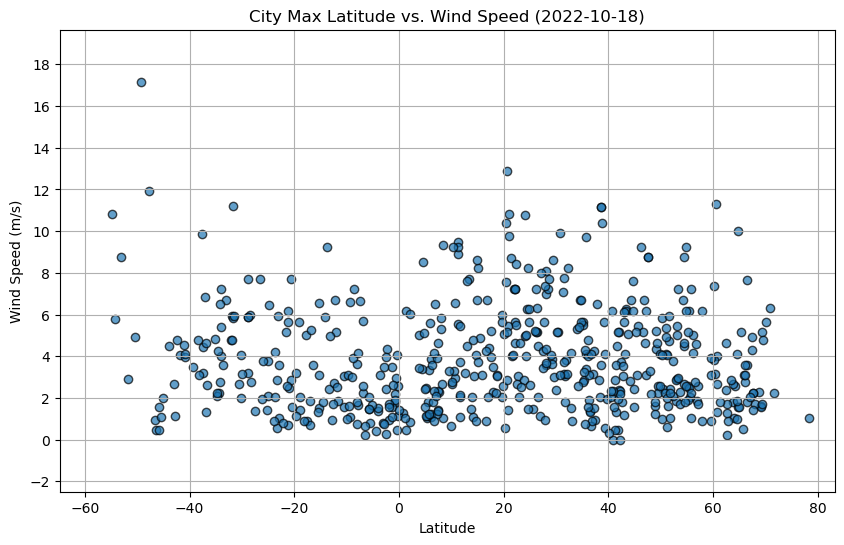

In [93]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', alpha = 0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)
plt.xlim(city_data_df['Lat'].min() - 10, city_data_df['Lat'].max() + 5)
plt.ylim(city_data_df['Wind Speed'].min() - 2.5, city_data_df['Wind Speed'].max() + 2.5)
plt.yticks(np.arange(city_data_df['Wind Speed'].min() - 2, city_data_df['Wind Speed'].max() + 2, 2))
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [135]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_values, y_values):
    """
    Creates a linear regression plot with the given x and y values.
    
    Parameters:
    x_values (numpy.ndarray): The independent variable values.
    y_values (numpy.ndarray): The dependent variable values.
    """
    # Calculate the linear regression
    correlation = st.pearsonr(x_values, y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    regression_line = x_values * slope + intercept

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o')
    plt.plot(x_values, regression_line, color='red', label='Regression Line')

    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')

    # Print the r-value
    print(f"The r value is: {rvalue:.2f}")

    # Add the equation to the plot
    equation = f'y = {slope: .2f}x + {intercept: .2f}'
    plt.text(0.05, 0.05, equation, ha='left', va='bottom', transform=plt.gca().transAxes, fontsize=12)

    plt.show()


In [97]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la'ie,21.6477,-157.9253,27.98,72,18,4.02,US,1712701012
2,cabo san lucas,22.8909,-109.9124,27.56,43,0,2.06,MX,1712700969
3,polyarnyy,69.1989,33.4478,-3.84,92,100,1.63,RU,1712701185
7,laguna,38.4210,-121.4238,25.62,39,0,2.06,US,1712701186
9,albany,42.6001,-73.9662,22.63,33,51,1.79,US,1712700918


In [98]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,warrnambool,-38.3833,142.4833,14.24,81,75,4.76,AU,1712701173
4,port-aux-francais,-49.3500,70.2167,8.52,94,100,17.16,TF,1712701185
5,grytviken,-54.2811,-36.5092,2.48,87,100,5.80,GS,1712700889
6,puerto ayora,-0.7393,-90.3518,30.98,92,39,1.79,EC,1712701185
8,flying fish cove,-10.4217,105.6791,24.82,88,40,1.54,CX,1712700921


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8457764646410808


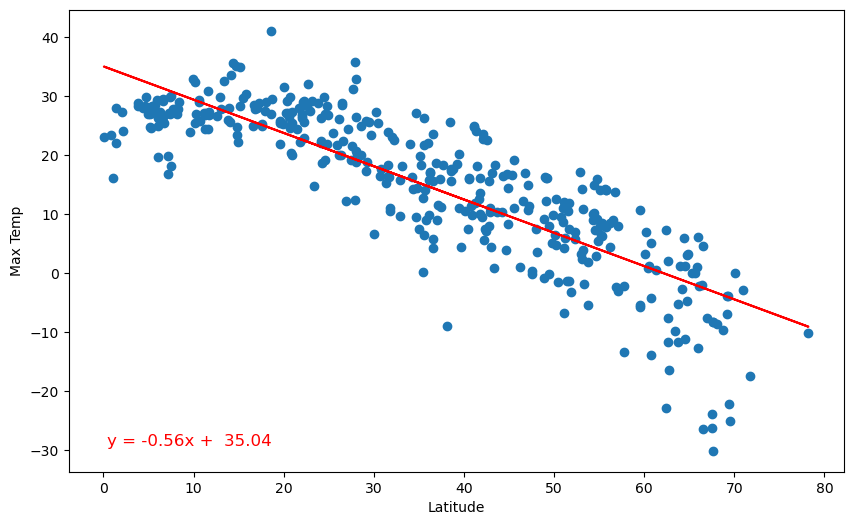

In [153]:
# Linear regression on Northern Hemisphere

x_value  = northern_hemi_df['Lat'].values
y_value = northern_hemi_df['Max Temp'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.05, equation, ha='left', va='bottom',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

The r value is: 0.7911127628870067


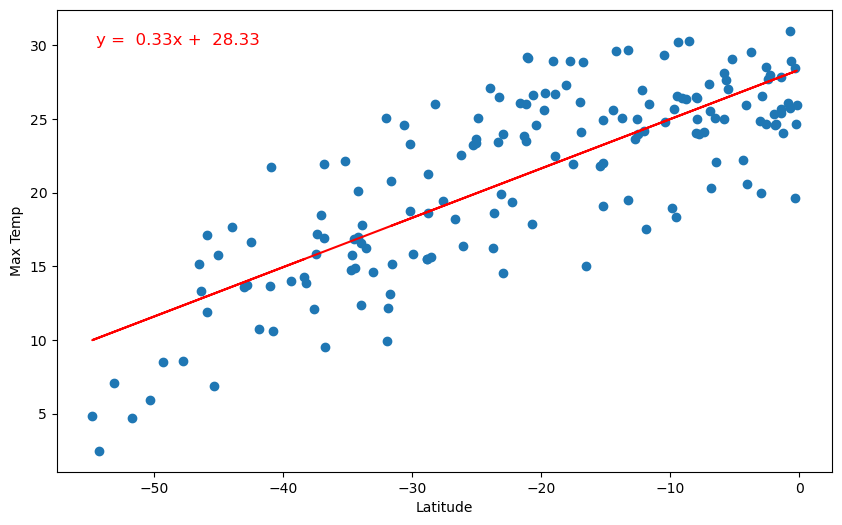

In [154]:
# Linear regression on Southern Hemisphere

x_value  = southern_hemi_df['Lat'].values
y_value = southern_hemi_df['Max Temp'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r value is: {rvalue}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.95, equation, ha='left', va='top',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Temperature vs latitude linear regression plots indicates a strong relationship between temperature and latitude, as indicated by the Pearson correlation coefficient (r) vlaues of -0.85 for the Northern hemisphere (negative relationship) and 0.79 (positive relationship) for the southern hemisphere, respectively. In northern hemisphere, as latitude increases temprature tends to decrease. Conversely, in southeren hemisphere, as latitude increases temperature tends to increase.  

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.20


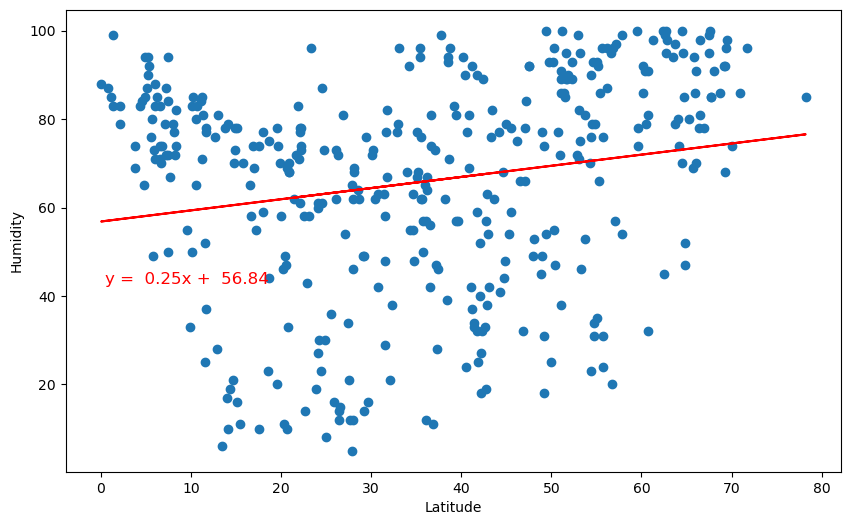

In [146]:
# Northern Hemisphere

x_value  = northern_hemi_df['Lat'].values
y_value = northern_hemi_df['Humidity'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r value is: {rvalue:.2f}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.4, equation, ha='left', va='bottom',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

The r value is: 0.31


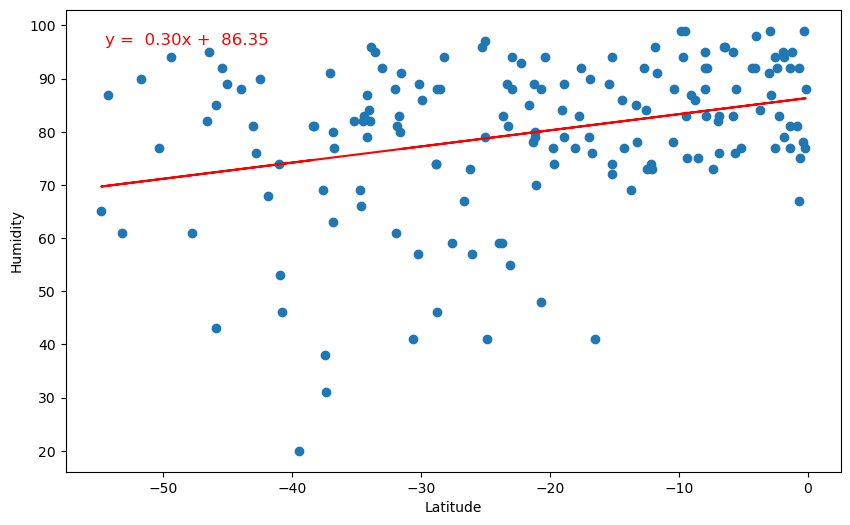

In [147]:
# Southern Hemisphere
x_value  = southern_hemi_df['Lat'].values
y_value = southern_hemi_df['Humidity'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r value is: {rvalue:.2f}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.95, equation, ha='left', va='top',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Humidity vs latitude linear regression plots indicates a weak positive relationship between humidity and latitude, as indicated by the Pearson correlation coefficient (r) vlaues of 0.2 for the Northern hemisphere and 0.31 for the southern hemisphere, respectively.  So, we can say, it may not be statisically significant or meaningful. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.10


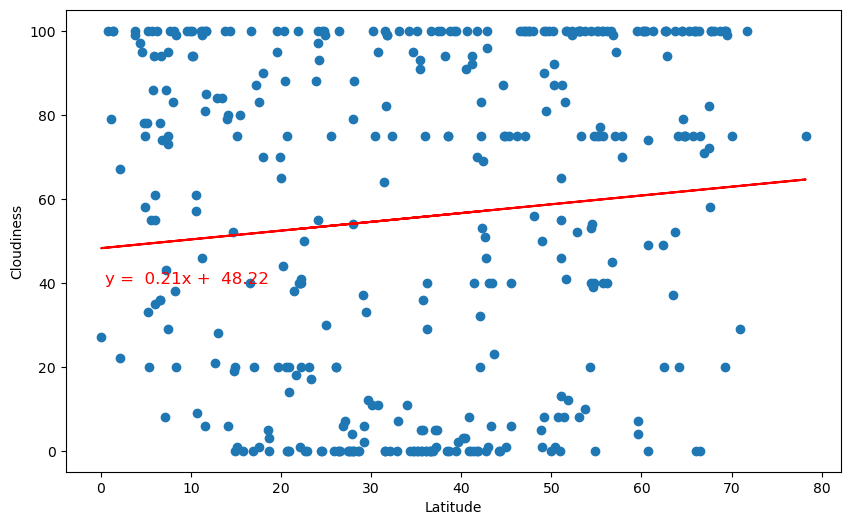

In [148]:
# Northern Hemisphere
x_value  = northern_hemi_df['Lat'].values
y_value = northern_hemi_df['Cloudiness'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r value is: {rvalue:.2f}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.4, equation, ha='left', va='bottom',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

The r value is: 0.19


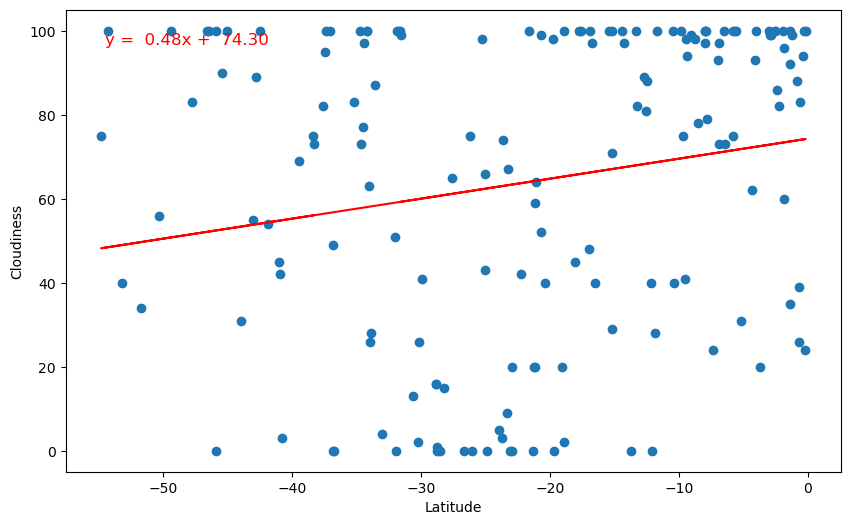

In [149]:
# Southern Hemisphere
x_value  = southern_hemi_df['Lat'].values
y_value = southern_hemi_df['Cloudiness'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r value is: {rvalue:.2f}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.95, equation, ha='left', va='top',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Cloudiness vs latitude linear regression plots indicates a weak positive relationship between cloudiness and latitude, as indicated by the Pearson correlation coefficient (r) vlaues of 0.1 for the Northern hemisphere and 0.19 for the southern hemisphere, respectively.  So, we can say, it may not be statisically significant or meaningful. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.10


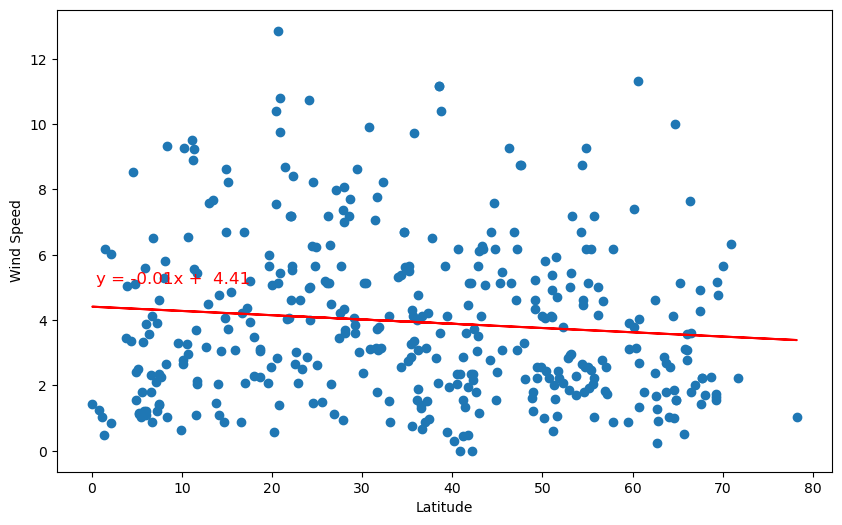

In [150]:
# Northern Hemisphere
x_value  = northern_hemi_df['Lat'].values
y_value = northern_hemi_df['Wind Speed'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r value is: {rvalue:.2f}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.4, equation, ha='left', va='bottom',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

The r value is: -0.38


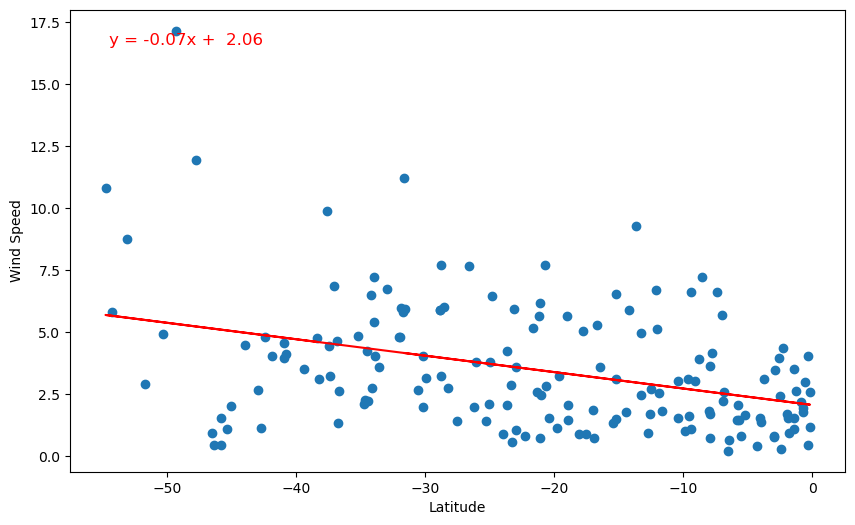

In [151]:
# Southern Hemisphere
x_value  = southern_hemi_df['Lat'].values
y_value = southern_hemi_df['Wind Speed'].values
correlation = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value + slope + intercept

regression_line = slope * x_value + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_value, y_value, marker='o')

plt.plot(x_value, regression_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r value is: {rvalue:.2f}")

equation = f'y = {slope: .2f}x + {intercept: .2f}'
plt.text(0.05, 0.95, equation, ha='left', va='top',transform=plt.gca().transAxes,fontsize=12, color='red')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Wind speed vs latitude linear regression plots indicates a weak negetive relationship between wind speed and latitude, as indicated by the Pearson correlation coefficient (r) vlaues of -0.1 for the Northern hemisphere and -0.38 for the southern hemisphere, respectively.  So, we can say, even though southern hemisphere shows a slightly higher magnitude, the relationship is still weak, which may not be statisically significant or meaningful. 